# DASC 512 - 14-15 - Continuous Distributions

***

First, as always, let's import our packages. Note that we'll also want to add scipy.stats to the list, as we'll use it extensively.

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_style('whitegrid')

Feel free to take and/or modify the below function to help you get a sense of a continuous distribution.

In [125]:
def plot_pdfcdf(dist = None, xlim = [-4,4], figsize=(4,4)):
    '''
    This function creates a figure containing two axes that plot the probability 
    density function and cumulative distribution function of a continuous distribution.
    
    Inputs:
    dist    : A parameterized distribution from scipy.stats. If omitted, will use standard normal.
    xlim    : The range of x values you want to plot. If omitted, defaults to [-4,4].
              This should be a list of 2 values of increasing value.
    figsize : Sets the figure size. Defaults to 4x4. 
              This should be a tuple of length 2.
        
    Returns:
    fig     : A figure object with two axes to further refine, display, or save.
    '''
    import scipy.stats as stats
    if dist == None:
        dist = stats.norm()
    x = np.linspace(xlim[0],xlim[1],1000)
    pdf = [dist.pdf(xx) for xx in x]
    cdf = [dist.cdf(xx) for xx in x]
    fig, ax = plt.subplots(nrows=2, figsize=figsize, sharex=True)
    ax[0].plot(x,pdf)
    ax[0].set_xlim(xlim)
    ax[0].set_ylabel(r'$f(x)$')
    ax[0].set_title('pdf')
    ax[1].plot(x,cdf)
    ax[1].set_xlim(xlim)
    ax[1].set_ylabel(r'$F(x)$')
    ax[1].set_xlabel(r'$x$')
    ax[1].set_title('cdf')
    fig.tight_layout()
    return fig

This function may be helpful too. It illustrates the area represented by the cdf at a given value.

In [126]:
def plot_cdf_filled(x, dist = None, xlim = [-4,4], figsize = (4,4)):
    '''
    This function creates a figure containing two axes that plot the probability 
    density function and cumulative distribution function of a continuous distribution.
    The pdf is filled left of x to demonstrate the cdf.
    
    Inputs:
    x       : The value of the cdf you'd like to plot.
    dist    : A parameterized distribution from scipy.stats. If omitted, will use standard normal.
    xlim    : The range of x values you want to plot. If omitted, defaults to [-4,4].
              This should be a list of 2 values of increasing value.
    figsize : Sets the figure size. Defaults to 4x4. 
              This should be a tuple of length 2.
        
    Returns:
    fig     : A figure object with two axes to further refine, display, or save.
    '''
    import scipy.stats as stats
    import numpy as np
    if dist == None:
        dist = stats.norm()
    pdfx = np.linspace(xlim[0],xlim[1],1000)
    pdf = [dist.pdf(xx) for xx in pdfx]
    cdf = [dist.cdf(xx) for xx in pdfx]
    fillx = np.linspace(xlim[0],min(x,xlim[1]),1000)
    filly = [dist.pdf(xx) for xx in fillx]
    fig, ax = plt.subplots(nrows=2, figsize=figsize, sharex=True)
    ax[0].plot(pdfx,pdf)
    ax[0].fill_between(x=fillx, y1=0, y2=filly, color='C0', alpha=0.5, label=f'$F({x})={dist.cdf(x):.2f}$')
    ax[0].legend()
    ax[0].axvline(x=x, color='black', ls='--')
    ax[0].set_xlim(xlim)
    ax[0].set_ylabel(r'$f(x)$')
    ax[0].set_title('pdf')
    ax[1].plot(pdfx,cdf)
    ax[1].axvline(x=x, color='black', ls='--')
    ax[1].axhline(y=dist.cdf(x), color='black', ls='--')
    ax[1].set_xlim(xlim)
    ax[1].set_ylabel(r'$F(x)$')
    ax[1].set_xlabel(r'$x$')
    ax[1].set_title('cdf')
    fig.tight_layout()
    return fig

## Continuous Distributions

### Normal Family

In [127]:
mu = 5
sigma = 2
dist = stats.norm(loc=mu, scale=sigma)  # Note this is the location/scale family

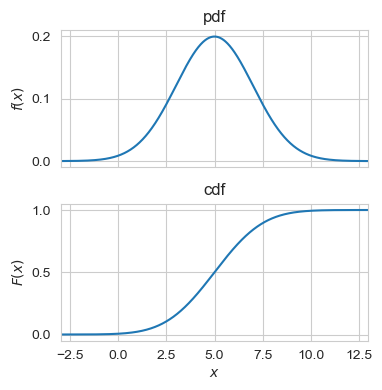

In [128]:
fig = plot_pdfcdf(dist=dist, xlim=[mu-4*sigma, mu+4*sigma])
plt.show()

In [129]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.')  # Note the change from discrete
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.17603266338214976.
CDF at x=6 is 0.6914624612740131.
PPF at q=0.75 is 6.348979500392163.
SF at x=6 is 0.3085375387259869.
ISF at q=0.75 is 3.651020499607837.
Expectation is 5.0.
Variance is 4.0.
Median is 5.0.
A random sample of 10 values is [2.98793055 4.52410355 3.75922178 6.34816864 2.61628197 8.08790645
 8.83824431 6.75654301 3.65362495 5.62900476].


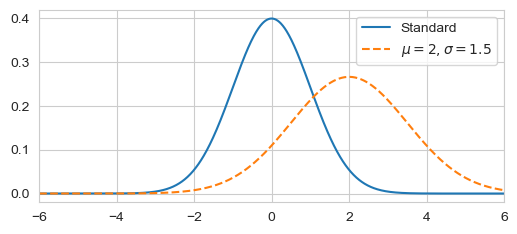

In [130]:
# Plotting location and scale families
mu = 2
sigma = 1.5

pdf_x = np.arange(-5*sigma,5*sigma,0.01)
pdf_std = [(stats.norm.pdf(x, 0, 1)) for x in pdf_x]
pdf_mod = [(stats.norm.pdf(x, mu, sigma)) for x in pdf_x]

fig, ax = plt.subplots(figsize=(6,2.5))
ax.plot(pdf_x, pdf_std, label='Standard')
ax.plot(pdf_x, pdf_mod, linestyle='--', label=f'$\mu={mu}, \sigma={sigma}$')
ax.set_xlim(-4*sigma, 4*sigma)
ax.legend()

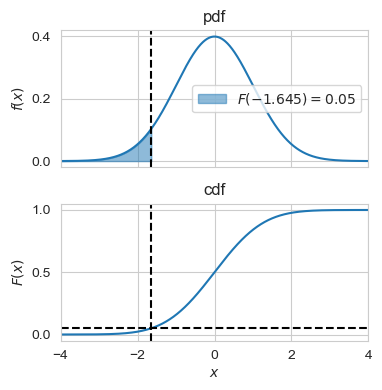

In [131]:
plot_cdf_filled(-1.645)
plt.show()

### Student's <i>t</i>-distribution

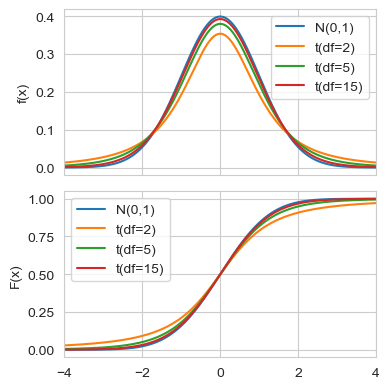

In [132]:
# Plot comparing normal and t

pdf_x = np.arange(-5, 5, 0.01)
pdf_norm = [(stats.norm.pdf(x, 0, 1)) for x in pdf_x]
pdf_t1 = [(stats.t.pdf(x, df=2)) for x in pdf_x]
pdf_t2 = [(stats.t.pdf(x, df=5)) for x in pdf_x]
pdf_t3 = [(stats.t.pdf(x, df=15)) for x in pdf_x]
cdf_x = np.arange(-5, 5, 0.01)
cdf_norm = [(stats.norm.cdf(x, 0, 1)) for x in cdf_x]
cdf_t1 = [(stats.t.cdf(x, df=2)) for x in pdf_x]
cdf_t2 = [(stats.t.cdf(x, df=5)) for x in pdf_x]
cdf_t3 = [(stats.t.cdf(x, df=15)) for x in pdf_x]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True)
ax1.plot(pdf_x, pdf_norm, label='N(0,1)')
ax1.plot(pdf_x, pdf_t1, label='t(df=2)')
ax1.plot(pdf_x, pdf_t2, label='t(df=5)')
ax1.plot(pdf_x, pdf_t3, label='t(df=15)')
ax2.plot(cdf_x, cdf_norm, label='N(0,1)')
ax2.plot(cdf_x, cdf_t1, label='t(df=2)')
ax2.plot(cdf_x, cdf_t2, label='t(df=5)')
ax2.plot(cdf_x, cdf_t3, label='t(df=15)')
ax1.set_xlim(-4, 4)
ax1.set_ylabel('f(x)')
ax2.set_ylabel('F(x)')
ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

In [133]:
df = 10
loc = 5
scale = 2
dist = stats.t(df=df, loc=loc, scale=scale)

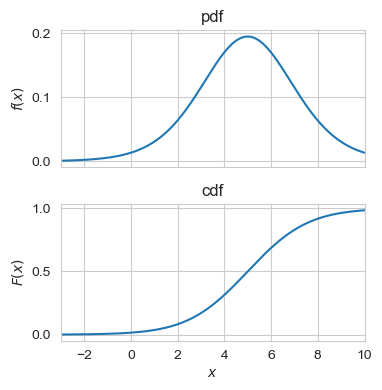

In [134]:
fig = plot_pdfcdf(dist=dist, xlim=[loc-4*scale, loc+4*scale])
plt.show()

In [135]:
x = 6
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.') 
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=6 is 0.169847568176039.
CDF at x=6 is 0.6860531971285135.
PPF at q=0.75 is 6.399624122624858.
SF at x=6 is 0.31394680287148646.
ISF at q=0.75 is 3.600375877375142.
Expectation is 5.000000000000003.
Variance is 5.0.
Median is 5.0.
A random sample of 10 values is [3.30239082 7.68368752 3.92495735 5.5434713  7.3065728  8.20120157
 0.61299811 8.45140647 3.55238982 7.4720846 ].


Note that the variance is not scale squared. The standard t distribution has variance df/(df-2). The scale parameter multiplies this value by scale squared. 

In [136]:
scale**2 * df / (df-2)

5.0

### $\chi^2$ Distribution

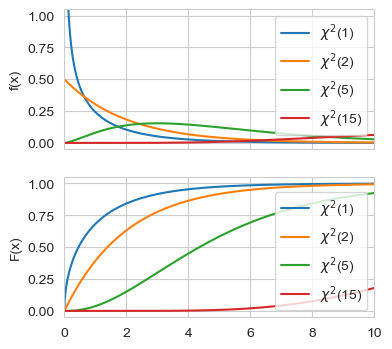

In [137]:
# Plot comparing pdf/cdf with various degrees of freedom

pdf_x = np.arange(0, 10, 0.01)
pdf_1 = [(stats.chi2.pdf(x, df=1)) for x in pdf_x]
pdf_2 = [(stats.chi2.pdf(x, df=2)) for x in pdf_x]
pdf_3 = [(stats.chi2.pdf(x, df=5)) for x in pdf_x]
pdf_4 = [(stats.chi2.pdf(x, df=15)) for x in pdf_x]
cdf_x = np.arange(0,10,0.01)
cdf_1 = [(stats.chi2.cdf(x, df=1)) for x in cdf_x]
cdf_2 = [(stats.chi2.cdf(x, df=2)) for x in pdf_x]
cdf_3 = [(stats.chi2.cdf(x, df=5)) for x in pdf_x]
cdf_4 = [(stats.chi2.cdf(x, df=15)) for x in pdf_x]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True)
ax1.plot(pdf_x, pdf_1, label='$\chi^2$(1)')
ax1.plot(pdf_x, pdf_2, label='$\chi^2$(2)')
ax1.plot(pdf_x, pdf_3, label='$\chi^2$(5)')
ax1.plot(pdf_x, pdf_4, label='$\chi^2$(15)')
ax2.plot(cdf_x, cdf_1, label='$\chi^2$(1)')
ax2.plot(cdf_x, cdf_2, label='$\chi^2$(2)')
ax2.plot(cdf_x, cdf_3, label='$\chi^2$(5)')
ax2.plot(cdf_x, cdf_4, label='$\chi^2$(15)')
ax1.set_xlim(0,10)
ax1.set_ylim(-0.05,1.05)
ax1.set_ylabel('f(x)')
ax2.set_ylabel('F(x)')
ax1.legend()
ax2.legend()

In [138]:
df = 15
dist = stats.chi2(df=df)

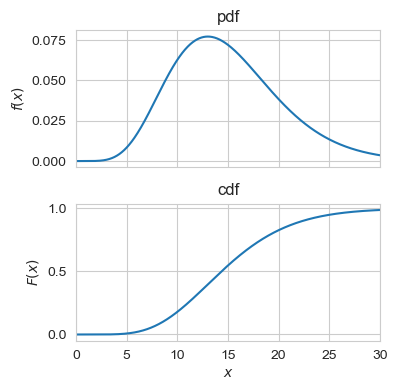

In [139]:
fig = plot_pdfcdf(dist=dist, xlim=[0, 30])
plt.show()

In [140]:
x = 10
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.') 
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=10 is 0.06290277576142639.
CDF at x=10 is 0.18026008049639844.
PPF at q=0.75 is 18.245085602415134.
SF at x=10 is 0.8197399195036016.
ISF at q=0.75 is 11.036537659091008.
Expectation is 14.999999999999991.
Variance is 30.0.
Median is 14.338859510956645.
A random sample of 10 values is [12.33474785 16.58218701 15.25191132 11.29961888 18.36887862 17.83220516
 13.29704739  8.08265554 24.39092836 14.799692  ].


### F Distribution

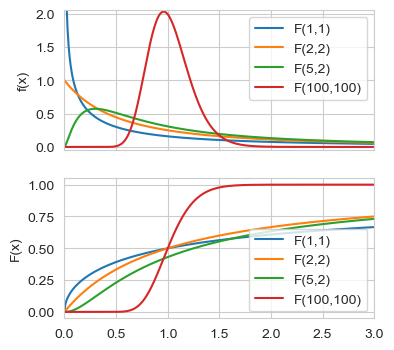

In [141]:
# Plot comparing pdf/cdf with various degrees of freedom

pdf_x = np.arange(0, 3, 0.01)
pdf_1 = [(stats.f.pdf(x, dfn=1, dfd=1)) for x in pdf_x]
pdf_2 = [(stats.f.pdf(x, dfn=2, dfd=2)) for x in pdf_x]
pdf_3 = [(stats.f.pdf(x, dfn=5, dfd=2)) for x in pdf_x]
pdf_4 = [(stats.f.pdf(x, dfn=100, dfd=100)) for x in pdf_x]
cdf_x = np.arange(0,3,0.01)
cdf_1 = [(stats.f.cdf(x, dfn=1, dfd=1)) for x in cdf_x]
cdf_2 = [(stats.f.cdf(x, dfn=2, dfd=2)) for x in pdf_x]
cdf_3 = [(stats.f.cdf(x, dfn=5, dfd=2)) for x in pdf_x]
cdf_4 = [(stats.f.cdf(x, dfn=100, dfd=100)) for x in pdf_x]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True)
ax1.plot(pdf_x, pdf_1, label='F(1,1)')
ax1.plot(pdf_x, pdf_2, label='F(2,2)')
ax1.plot(pdf_x, pdf_3, label='F(5,2)')
ax1.plot(pdf_x, pdf_4, label='F(100,100)')
ax2.plot(cdf_x, cdf_1, label='F(1,1)')
ax2.plot(cdf_x, cdf_2, label='F(2,2)')
ax2.plot(cdf_x, cdf_3, label='F(5,2)')
ax2.plot(cdf_x, cdf_4, label='F(100,100)')
ax1.set_xlim(0,3)
ax1.set_ylim(-0.05,2.05)
ax1.set_ylabel('f(x)')
ax2.set_ylabel('F(x)')
ax1.legend()
ax2.legend()

In [142]:
dfn = 5
dfd = 100
dist = stats.f(dfn=dfn, dfd=dfd)

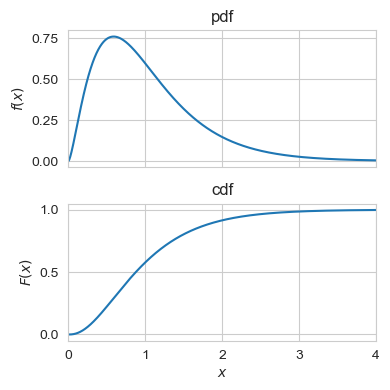

In [143]:
fig = plot_pdfcdf(dist=dist, xlim=[0, 4])
plt.show()

In [144]:
x = 2
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.') 
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=2 is 0.14645888550675476.
CDF at x=2 is 0.9149201497254085.
PPF at q=0.75 is 1.3493373376346982.
SF at x=2 is 0.08507985027459157.
ISF at q=0.75 is 0.5340838822497622.
Expectation is 1.020408163264803.
Variance is 0.44686241843676244.
Median is 0.8761990472073524.
A random sample of 10 values is [0.63715461 0.92857002 0.66778017 0.67229683 0.66958382 0.62658336
 0.78729169 0.93863456 2.0946817  1.33255097].


### Lognormal Distribution

Note that scipy.stats uses sigma as the "shape parameter" s, and exp(mu) as the scale parameter.

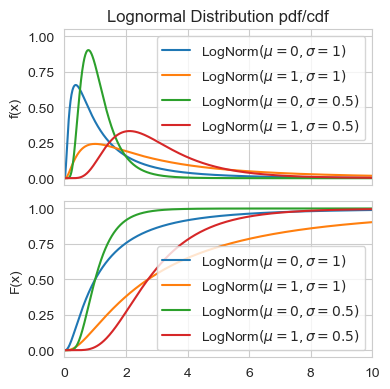

In [145]:
# Plot comparing pdf/cdf with various values
# Note that scipy.stats.expon uses sigma as the 'shape parameter' s and (exp(mu)) as the 'scale parameter'
# By specifying a 'loc' parameter, you can access the location family of the lognormal distribution

pdf_x = np.arange(0, 10, 0.01)
pdf_1 = [(stats.lognorm.pdf(x, s=1, scale=np.exp(0))) for x in pdf_x]
pdf_2 = [(stats.lognorm.pdf(x, s=1, scale=np.exp(1))) for x in pdf_x]
pdf_3 = [(stats.lognorm.pdf(x, s=0.5, scale=np.exp(0))) for x in pdf_x]
pdf_4 = [(stats.lognorm.pdf(x, s=0.5, scale=np.exp(1))) for x in pdf_x]
cdf_x = np.arange(0,10,0.01)
cdf_1 = [(stats.lognorm.cdf(x, s=1, scale=np.exp(0))) for x in cdf_x]
cdf_2 = [(stats.lognorm.cdf(x, s=1, scale=np.exp(1))) for x in cdf_x]
cdf_3 = [(stats.lognorm.cdf(x, s=0.5, scale=np.exp(0))) for x in cdf_x]
cdf_4 = [(stats.lognorm.cdf(x, s=0.5, scale=np.exp(1))) for x in cdf_x]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True)
ax1.plot(pdf_x, pdf_1, label='LogNorm$(\mu=0, \sigma=1)$')
ax1.plot(pdf_x, pdf_2, label='LogNorm$(\mu=1, \sigma=1)$')
ax1.plot(pdf_x, pdf_3, label='LogNorm$(\mu=0, \sigma=0.5)$')
ax1.plot(pdf_x, pdf_4, label='LogNorm$(\mu=1, \sigma=0.5)$')
ax2.plot(cdf_x, cdf_1, label='LogNorm$(\mu=0, \sigma=1)$')
ax2.plot(cdf_x, cdf_2, label='LogNorm$(\mu=1, \sigma=1)$')
ax2.plot(cdf_x, cdf_3, label='LogNorm$(\mu=0, \sigma=0.5)$')
ax2.plot(cdf_x, cdf_4, label='LogNorm$(\mu=1, \sigma=0.5)$')
ax1.set_title('Lognormal Distribution pdf/cdf')
ax1.set_xlim(0,10)
ax1.set_ylim(-0.05,1.05)
ax1.set_ylabel('f(x)')
ax2.set_ylabel('F(x)')
ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

In [146]:
mu = 1
sigma = 0.5
dist = stats.lognorm(s=sigma, scale=np.exp(mu))

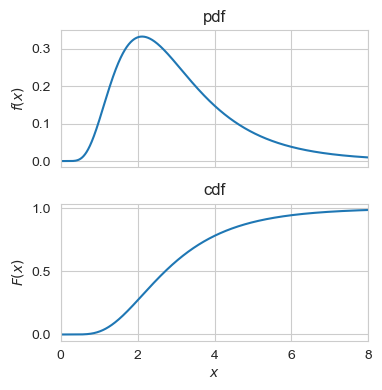

In [147]:
fig = plot_pdfcdf(dist=dist, xlim=[0, 8])
plt.show()

In [148]:
x = 2
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.') 
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=2 is 0.33046456598348395.
CDF at x=2 is 0.26970493073490953.
PPF at q=0.75 is 3.808536044832714.
SF at x=2 is 0.7302950692650905.
ISF at q=0.75 is 1.9401302789180261.
Expectation is 3.0802168489180195.
Variance is 2.694758124344946.
Median is 2.718281828459045.
A random sample of 10 values is [2.1030582  2.42956774 2.22719449 6.09130261 1.73042887 1.02311635
 2.09888626 1.86440355 3.06119479 2.64992713].


### Exponential Distribution
Again, this distribution has non-standard inputs. Use scale = 1/lambda

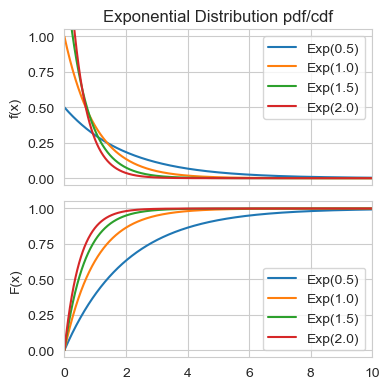

In [149]:
# Plot comparing pdf/cdf with various rates
# By specifying a 'loc' parameter, you can access the location family of the exponential distribution

pdf_x = np.arange(0, 10, 0.01)
pdf_1 = [(stats.expon.pdf(x, scale=1/0.5)) for x in pdf_x]
pdf_2 = [(stats.expon.pdf(x, scale=1/1)) for x in pdf_x]
pdf_3 = [(stats.expon.pdf(x, scale=1/1.5)) for x in pdf_x]
pdf_4 = [(stats.expon.pdf(x, scale=1/2)) for x in pdf_x]
cdf_x = np.arange(0,10,0.01)
cdf_1 = [(stats.expon.cdf(x, scale=1/0.5)) for x in cdf_x]
cdf_2 = [(stats.expon.cdf(x, scale=1/1)) for x in cdf_x]
cdf_3 = [(stats.expon.cdf(x, scale=1/1.5)) for x in cdf_x]
cdf_4 = [(stats.expon.cdf(x, scale=1/2)) for x in cdf_x]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(4,4), sharex=True)
ax1.plot(pdf_x, pdf_1, label='Exp(0.5)')
ax1.plot(pdf_x, pdf_2, label='Exp(1.0)')
ax1.plot(pdf_x, pdf_3, label='Exp(1.5)')
ax1.plot(pdf_x, pdf_4, label='Exp(2.0)')
ax2.plot(cdf_x, cdf_1, label='Exp(0.5)')
ax2.plot(cdf_x, cdf_2, label='Exp(1.0)')
ax2.plot(cdf_x, cdf_3, label='Exp(1.5)')
ax2.plot(cdf_x, cdf_4, label='Exp(2.0)')
ax1.set_title('Exponential Distribution pdf/cdf')
ax1.set_xlim(0,10)
ax1.set_ylim(-0.05,1.05)
ax1.set_ylabel('f(x)')
ax2.set_ylabel('F(x)')
ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

In [150]:
lamb = 3  # Remember lambda is a keyword, so you cannot name a variable that
dist = stats.expon(scale=1/lamb)

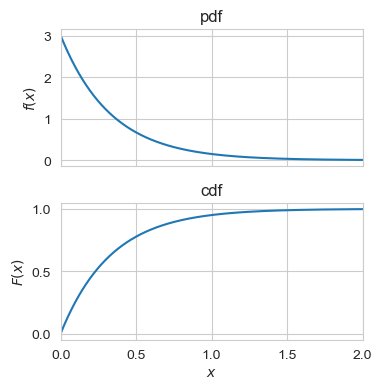

In [151]:
fig = plot_pdfcdf(dist=dist, xlim=[0, 2])
plt.show()

In [152]:
x = 0.5
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.') 
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=0.5 is 0.6693904804452895.
CDF at x=0.5 is 0.7768698398515702.
PPF at q=0.75 is 0.46209812037329684.
SF at x=0.5 is 0.22313016014842982.
ISF at q=0.75 is 0.09589402415059363.
Expectation is 0.33333333333333326.
Variance is 0.1111111111111111.
Median is 0.23104906018664842.
A random sample of 10 values is [0.01174864 0.13441061 0.04422835 0.20386987 0.12690608 0.02976301
 0.09116948 0.55790044 0.18842388 0.79310887].


### Beta Distribution

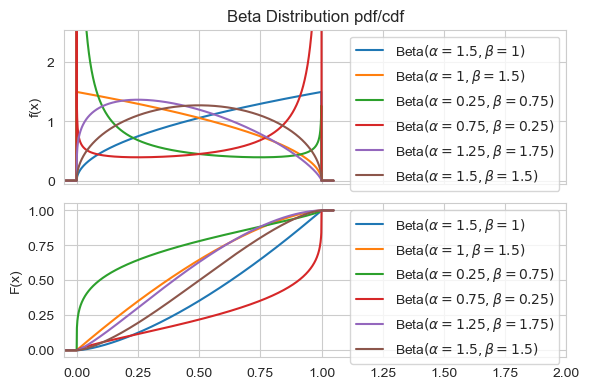

In [153]:
pdf_x = np.arange(-0.05,1.05,0.001)
pdf_1 = [(stats.beta.pdf(x, a=1.5, b=1)) for x in pdf_x]
pdf_2 = [(stats.beta.pdf(x, a=1, b=1.5)) for x in pdf_x]
pdf_3 = [(stats.beta.pdf(x, a=0.25, b=0.75)) for x in pdf_x]
pdf_4 = [(stats.beta.pdf(x, a=0.75, b=0.25)) for x in pdf_x]
pdf_5 = [(stats.beta.pdf(x, a=1.25, b=1.75)) for x in pdf_x]
pdf_6 = [(stats.beta.pdf(x, a=1.5, b=1.5)) for x in pdf_x]
cdf_1 = [(stats.beta.cdf(x, a=1.5, b=1)) for x in pdf_x]
cdf_2 = [(stats.beta.cdf(x, a=1, b=1.5)) for x in pdf_x]
cdf_3 = [(stats.beta.cdf(x, a=0.25, b=0.75)) for x in pdf_x]
cdf_4 = [(stats.beta.cdf(x, a=0.75, b=0.25)) for x in pdf_x]
cdf_5 = [(stats.beta.cdf(x, a=1.25, b=1.75)) for x in pdf_x]
cdf_6 = [(stats.beta.cdf(x, a=1.5, b=1.5)) for x in pdf_x]

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4), sharex=True)
ax1.plot(pdf_x, pdf_1, label=r'Beta$(\alpha=1.5, \beta=1)$')
ax1.plot(pdf_x, pdf_2, label=r'Beta$(\alpha=1, \beta=1.5)$')
ax1.plot(pdf_x, pdf_3, label=r'Beta$(\alpha=0.25, \beta=0.75)$')
ax1.plot(pdf_x, pdf_4, label=r'Beta$(\alpha=0.75, \beta=0.25)$')
ax1.plot(pdf_x, pdf_5, label=r'Beta$(\alpha=1.25, \beta=1.75)$')
ax1.plot(pdf_x, pdf_6, label=r'Beta$(\alpha=1.5, \beta=1.5)$')
ax2.plot(pdf_x, cdf_1, label=r'Beta$(\alpha=1.5, \beta=1)$')
ax2.plot(pdf_x, cdf_2, label=r'Beta$(\alpha=1, \beta=1.5)$')
ax2.plot(pdf_x, cdf_3, label=r'Beta$(\alpha=0.25, \beta=0.75)$')
ax2.plot(pdf_x, cdf_4, label=r'Beta$(\alpha=0.75, \beta=0.25)$')
ax2.plot(pdf_x, cdf_5, label=r'Beta$(\alpha=1.25, \beta=1.75)$')
ax2.plot(pdf_x, cdf_6, label=r'Beta$(\alpha=1.5, \beta=1.5)$')
ax1.set_title('Beta Distribution pdf/cdf')
ax1.set_xlim(-0.05,2)
ax1.set_ylim(-0.05,2.55)
ax1.set_ylabel('f(x)')
ax2.set_ylabel('F(x)')
ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

In [154]:
a = 1.5
b = 1.15
dist = stats.beta(a=a, b=b)

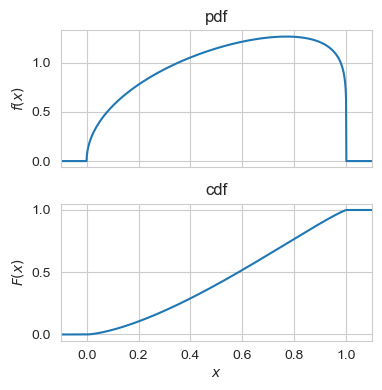

In [155]:
fig = plot_pdfcdf(dist, xlim=[-0.1,1.1])
plt.show()

In [156]:
x = 0.5
q = 0.75
print(f'PDF at x={x} is {dist.pdf(x=x)}.') 
print(f'CDF at x={x} is {dist.cdf(x=x)}.')
print(f'PPF at q={q} is {dist.ppf(q=q)}.')
print(f'SF at x={x} is {dist.sf(x=x)}.')
print(f'ISF at q={q} is {dist.isf(q=q)}.')
print(f'Expectation is {dist.expect()}.')
print(f'Variance is {dist.var()}.')
print(f'Median is {dist.median()}.')
print(f'A random sample of 10 values is {dist.rvs(size=10)}.')

PDF at x=0.5 is 1.1446367510512803.
CDF at x=0.5 is 0.4004104475250646.
PPF at q=0.75 is 0.7855576523108267.
SF at x=0.5 is 0.5995895524749355.
ISF at q=0.75 is 0.36084812814109263.
Expectation is 0.5660377358246299.
Variance is 0.06729836094354252.
Median is 0.5847079352418073.
A random sample of 10 values is [0.10465216 0.17647838 0.9933299  0.9769755  0.76023    0.91080546
 0.21801691 0.95229801 0.84766951 0.77747783].


### Uniform Distribution
This distribution, like the normal, implements the standard version and allows you to invoke the location/scale family to widen and/or shift the distribution.

In [157]:
a = 1
b = 5
dist = stats.uniform(loc=a, scale=b-a)

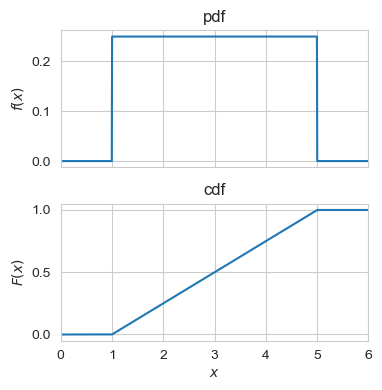

In [158]:
fig = plot_pdfcdf(dist, xlim=[0,6])
plt.show()

### Other Distributions

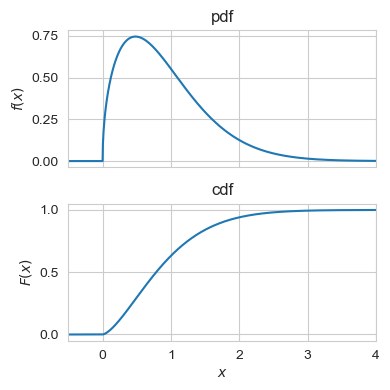

In [159]:
# Weibull
c = 1.5
dist = stats.weibull_min(c = c)
fig = plot_pdfcdf(dist, xlim=[-0.5,4])
plt.show()

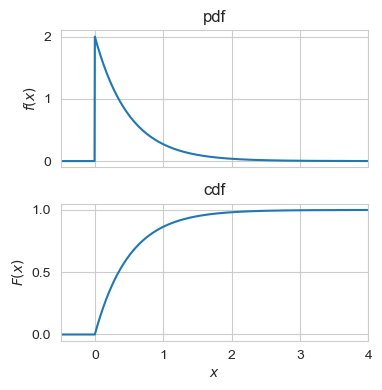

In [160]:
# Gamma
a = 1
b = 2
dist = stats.gamma(a=a, scale=1/b)
fig = plot_pdfcdf(dist, xlim=[-0.5,4])
plt.show()

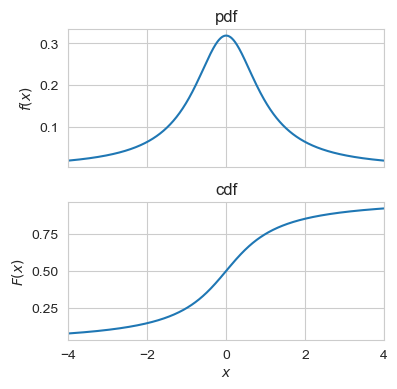

In [161]:
# Cauchy
dist = stats.cauchy()
fig = plot_pdfcdf(dist, xlim=[-4,4])
plt.show()

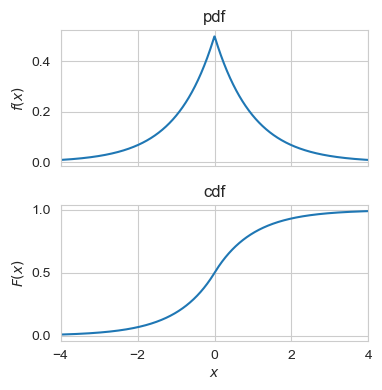

In [162]:
# Double Exponential
dist = stats.laplace()
fig = plot_pdfcdf(dist, xlim=[-4,4])
plt.show()

# See you next time!